## DSCI - 552 HOMEWORK 1

Name: Varsha Kini$\quad$Github Username: Varsha-Kini$\quad$USC ID: 4013488464  

In [1]:
# Reference: https://www.codegrepper.com/code-examples/python/change+color+++seaborn+pairplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius', 'Grade of Spondylolisthesis', 'Class']
df=pd.read_csv("../data/vertebral_column_data/column_2C.dat", sep= " ", header = None, names = col_names)
df.loc[:, 'Class'].replace('AB', 1 , inplace=True)
df.loc[:, 'Class'].replace('NO', 0 , inplace=True)
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


1(b)(i) Scatterplots of the independent variables in the dataset.

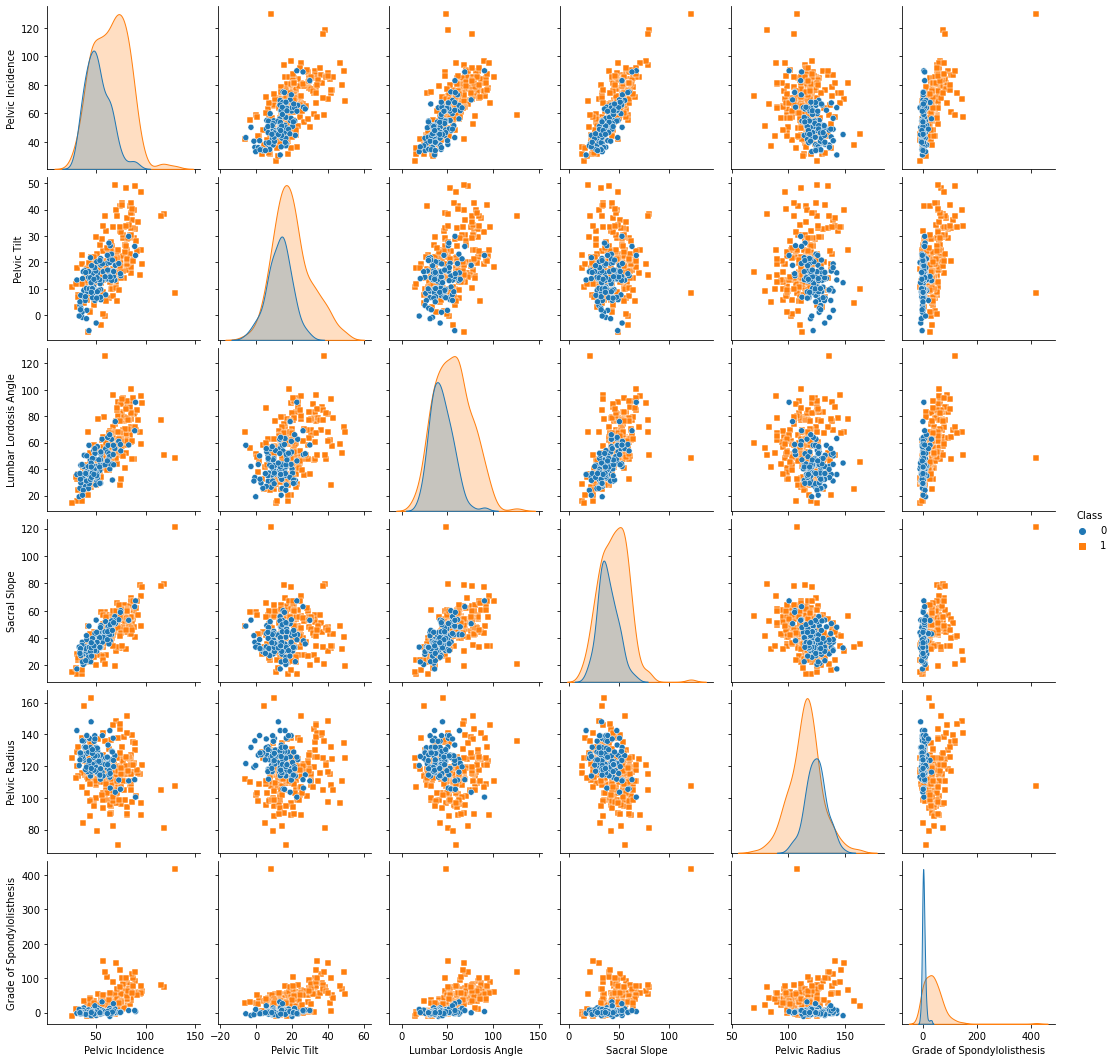

In [3]:
# Reference: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
sns.pairplot(df, hue="Class", markers=["o", "s"])
plt.show()

1(b)(ii) Boxplots for each of the independent variables

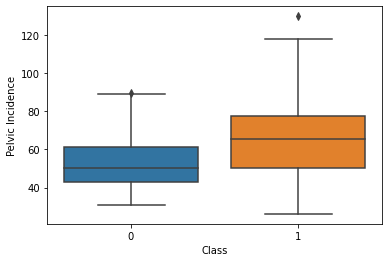

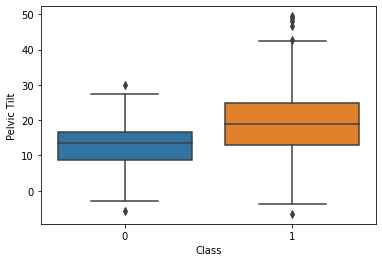

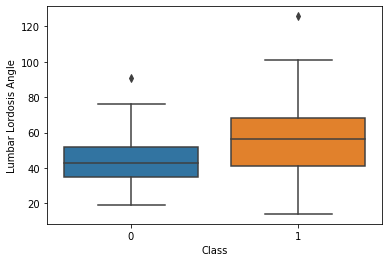

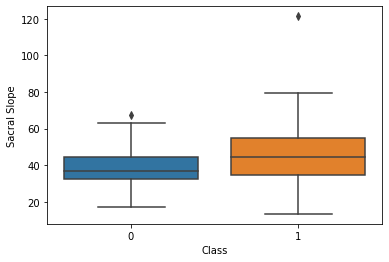

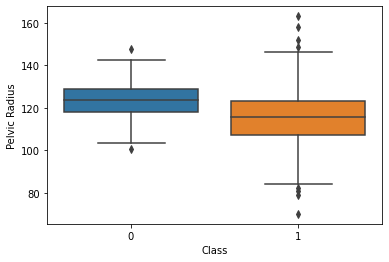

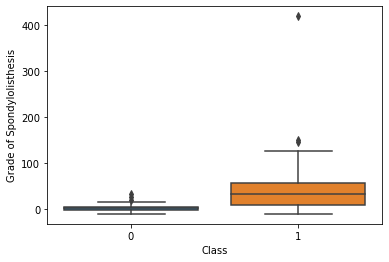

In [4]:
# Reference: https://wellsr.com/python/how-to-make-seaborn-boxplots-in-python/
for i in df.columns:
    if i != 'Class':
        sns.boxplot(x='Class', y=i, data=df)
        plt.show()

1(b)(iii) Split the rows of Class 0 and Class 1 into training and test set

In [5]:
# Reference: https://www.stackvidhya.com/add-row-to-dataframe/#:~:text=You%20can%20add%20rows%20to%20the%20dataframe%20using%20four%20methods,iloc%5B%5D%20and%20loc%5B%5D%20.
trainset = df[df["Class"] == 0].iloc[0:70, :]
trainset = pd.concat([trainset,df[df["Class"] == 1].iloc[0:140, :]], ignore_index = True)
testset = df[df["Class"] == 0].iloc[70:, :]
testset = pd.concat([testset,df[df["Class"] == 1].iloc[140:, :]], ignore_index = True)

1(c)(i) Code for k-nearest neighbors with Euclidean metric

In [6]:
# Reference: https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
traindata = trainset.drop('Class', axis=1)
trainlabels = trainset["Class"]
testdata = testset.drop('Class', axis=1)
testlabels = testset["Class"]

1(c)(ii) Test all the data in the test database with k-nearest neighbors, Calculating train error rate and test error rate against each k

In [7]:
# Reference: https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php
train_error, test_error = [], []
k_values = []
for i in range(208, 0, -1):
    k_values.append(i)
    classifier = KNeighborsClassifier(n_neighbors= i, metric = 'euclidean', p=2)
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    train_score = classifier.score(traindata, trainlabels)
    test_score = classifier.score(testdata, testlabels)
    train_error.append(1-train_score)
    test_error.append(1-test_score)
# print(min(test_error))
#     print(accuracy_score(predicted, testlabels))

1(c)(ii) Plot train and test errors in terms of k

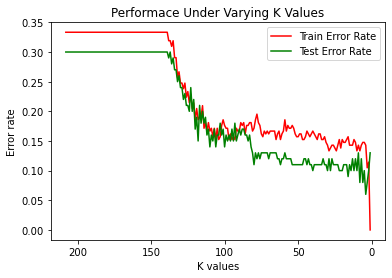

In [8]:
plt.plot(k_values,train_error, color='red', label='Train Error Rate')
plt.plot(k_values,test_error, color='green', label='Test Error Rate')
plt.legend()
plt.xlabel('K values')
plt.ylabel('Error rate')
plt.title('Performace Under Varying K Values')
rev = plt.gca()
rev.invert_xaxis()

1(c)(ii) Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k= k*

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True Positive rate is 0.9857142857142858
True Negative rate is 0.8333333333333334


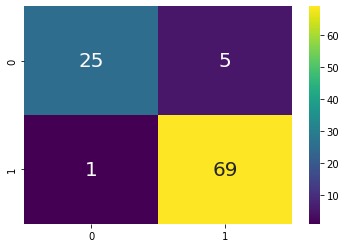

In [9]:
# Reference: https://ai.plainenglish.io/how-to-find-best-fit-k-value-in-knn-4f8a31ba64f2
# Reference: https://www.split.io/glossary/false-positive-rate/
# The accuracy score is maximum at k=4. Therefore, k* =4
classifier = KNeighborsClassifier(n_neighbors= 4, metric = 'euclidean', p=2)
classifier.fit(traindata, trainlabels)
predicted = classifier.predict(testdata)
print(classification_report(testlabels,predicted))
con_mat=confusion_matrix(testlabels,predicted)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()


1(c)(iii) Plot learning curve against a training size of variable size n

The k values for the best test error is:  [1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]


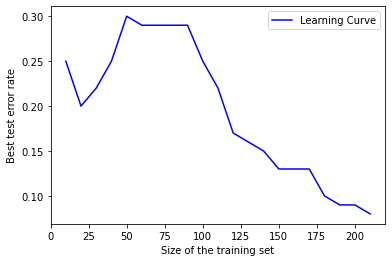

In [10]:
best_error = []
n_values = []
best_k=[]
for n in range(10,211,10):
    n_values.append(n)
    test_error = []
    k_values = []
    class_0_num = n//3
    class_1_num = n-(n//3)
    trainset = df[df["Class"] == 0].iloc[0:class_0_num, :]
    trainset = pd.concat([trainset,df[df["Class"] == 1].iloc[0:class_1_num, :]], ignore_index = True)
    traindata = trainset.drop('Class', axis=1)
    trainlabels = trainset["Class"]
    for k in range(1, n, 5):
        classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean', p=2)
        classifier.fit(traindata, trainlabels)
        predicted = classifier.predict(testdata)
        test_score = classifier.score(testdata, testlabels)
        test_error.append(1-test_score)
        k_values.append(k)
    best_error.append(min(test_error))
    ind = test_error.index(min(test_error))
    best_k.append(k_values[ind])

plt.plot(n_values, best_error, color='blue', label='Learning Curve')
plt.xlabel('Size of the training set')
plt.ylabel('Best test error rate')
plt.legend()
print("The k values for the best test error is: ", best_k)

1(d)(i)(A) Replace the euclidean metric with Minkowski distance which becomes Manhattan distance at p=1

In [11]:
# Reference: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=1)
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    test_error.append(1-test_score)
table_data = {}
table_data['k'] = k_values
table_data['Test Error'] = test_error

table = pd.DataFrame(table_data)
display(table)

,k,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


1(d)(i)(B) Find k=k* value for Manhattan distance

In [17]:
min_index = test_error.index(min(test_error))
k_min = k_values[min_index]
k_min

6

1(d)(i)(B) Replace the euclidean metric with Minkowski distance with log10(p)={0.1, 0.2,...., 1} with the value of k* obtained from Manhattan distance

In [18]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://www.tutorialspoint.com/python3/number_log10.htm
import math
p_values= 10**np.arange(0.1, 1.1, 0.1)
test_error = []
for i in p_values:
    classifier = KNeighborsClassifier(n_neighbors= k_min, metric = 'minkowski', p=i)
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    test_error.append(1-test_score)
log_p_values = []
for i in p_values:
    log_p_values.append(math.log10(i))

table_data = {}
table_data['log10(p)'] = log_p_values
table_data['Test Error'] = test_error

table = pd.DataFrame(table_data)
display(table)

,log10(p),Test Error
0,0.1,0.09
1,0.2,0.09
2,0.3,0.08
3,0.4,0.08
4,0.5,0.08
5,0.6,0.06
6,0.7,0.07
7,0.8,0.08
8,0.9,0.09
9,1.0,0.09


1(d)(i)(B) Find the best log10(p)

In [19]:
min_index = test_error.index(min(test_error))
best_log = log_p_values[min_index]
best_log

0.6

1(d)(i)(C) Replace the euclidean metric with Minkowski distance which becomes Chebyshev distance at p=infinity

In [20]:
import math
test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=math.inf)
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    test_error.append(1-test_score)
table_data = {}
table_data['k'] = k_values
table_data['Test Error'] = test_error

table = pd.DataFrame(table_data)
display(table)

,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


1(d)(ii) Replace the euclidean metric with Mahalanobis distance

In [21]:
test_error = []
for i in range(1, 197, 5):
    covar = np.cov(traindata, rowvar=False)
    classifier = KNeighborsClassifier(n_neighbors=i, algorithm='auto', metric='mahalanobis',metric_params={'VI': np.linalg.pinv(covar)})
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    test_error.append(1-test_score)
table_data = {}
table_data['k'] = k_values
table_data['Test Error'] = test_error

table = pd.DataFrame(table_data)
display(table)

,k,Test Error
0,1,0.17
1,6,0.17
2,11,0.20
3,16,0.20
4,21,0.21
5,26,0.20
6,31,0.23
7,36,0.21
8,41,0.24
9,46,0.24


1(e) Majority polling decision replaced by weighted decision using Euclidean distance

In [22]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
euclidean_test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean', p=2, weights ='distance')
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    euclidean_test_error.append(1-test_score)
table_data = {}
table_data['k'] = k_values
table_data['Test Error'] = euclidean_test_error

min_index = euclidean_test_error.index(min(euclidean_test_error))
euclidean_k = k_values[min_index]
euclidean_min_error = euclidean_test_error[min_index]

table = pd.DataFrame(table_data)
display(table)

,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.11
4,21,0.11
5,26,0.11
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


1(e) Majority polling decision replaced by weighted decision using Manhattan distance

In [23]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
manhattan_test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski', p=1, weights ='distance')
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    manhattan_test_error.append(1-test_score)
table_data = {}
table_data['k'] = k_values
table_data['Test Error'] = manhattan_test_error

min_index = manhattan_test_error.index(min(manhattan_test_error))
manhattan_k = k_values[min_index]
manhattan_min_error = manhattan_test_error[min_index]

table = pd.DataFrame(table_data)
display(table)

,k,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.11
5,26,0.10
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


1(e) Majority polling decision replaced by weighted decision using Chebyshev distance

In [24]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
import math
chebyshev_test_error = []
k_values = []
for k in range(1,197,5):
    k_values.append(k)
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=math.inf, weights ='distance')
    classifier.fit(traindata, trainlabels)
    predicted = classifier.predict(testdata)
    test_score = classifier.score(testdata, testlabels)
    chebyshev_test_error.append(1-test_score)
table_data = {}
table_data['k'] = k_values
table_data['Test Error'] = chebyshev_test_error

min_index = chebyshev_test_error.index(min(chebyshev_test_error))
chebyshev_k = k_values[min_index]
chebyshev_min_error = chebyshev_test_error[min_index]

table = pd.DataFrame(table_data)
display(table)

,k,Test Error
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


1(e) Use weighted voting with Euclidean, Manhattan and Chebyshev distances and report the best test errors when k∈ {1, 6, 11,..., 196}

In [25]:
weighted_voting = {}
weighted_voting['Methods'] = ['Euclidean', 'Manhattan', 'Chebyshev'] 
weighted_voting['K'] = [euclidean_k, manhattan_k, chebyshev_k]
weighted_voting['Test Error'] = [euclidean_min_error, manhattan_min_error, chebyshev_min_error]

table = pd.DataFrame(weighted_voting)
display(table)

,Methods,K,Test Error
0,Euclidean,6,0.10
1,Manhattan,26,0.10
2,Chebyshev,16,0.11


1(f) Lowest training error rate

The lowest training set error is 0.0 and this happens when k = 1.